In [1]:
import sys
sys.path.append('..')
sys.path.append('../stylegan3')

import torch
from latents_dataset import LatentsDataset

from torch import nn
from torch.utils.data import random_split, DataLoader
from torchvision import transforms

from models.LatentsAutoencoder import LatentsAutoencoder
from pytorch_nn import NNUtil

import numpy as np
formatter={'float_kind':"{:.6f}".format}
np.set_printoptions(formatter=formatter)

torch.set_printoptions(precision=3, sci_mode=False)

In [2]:
data_path = '/home/robert/data/diploma-thesis/datasets/stylegan3/tpsi_1/latents/sample_z.h5'
targets_path = '/home/robert/data/diploma-thesis/predictions/stylegan3/tpsi_1/resnet34_eyeglasses.pkl'
batch_size = 64

In [3]:
transform = transforms.Compose([])
ld = LatentsDataset(data_path, targets_path)
# dataset = ld.load_autoencoder_dataset(transform=transform, minmax_norm = False, include_targets = True)
dataset = ld.load_custom_dataset(transform=transform)
train_data, valid_data, test_data = random_split(dataset, [0.8, 0.1, 0.1], generator=torch.Generator().manual_seed(42))

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

for X, y in test_dataloader:
    print(f'Shape of X [N, C, H, W]: {X.shape}',  X)
    print(f'Shape of y: {y.shape} {y.dtype}', y)
    break

-5.059809042173977e-05 0.9999549828988944
Shape of X [N, C, H, W]: torch.Size([64, 512]) tensor([[ 1.938,  1.041, -1.661,  ..., -0.426,  0.715, -1.147],
        [-1.325, -0.604, -0.673,  ..., -0.394,  0.491,  0.489],
        [ 0.889,  1.482, -1.813,  ...,  0.103, -0.796, -1.123],
        ...,
        [ 0.552, -0.196, -0.260,  ..., -0.485, -0.486,  0.155],
        [ 0.456, -0.445,  1.293,  ...,  0.906, -0.349,  0.070],
        [-0.522,  1.517,  1.925,  ..., -1.277,  0.237, -1.385]])
Shape of y: torch.Size([64, 1]) torch.float32 tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
     

In [4]:
input_shape = (batch_size, len(dataset[0][0]))
model = LatentsAutoencoder(input_shape=input_shape)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1, weight_decay=1e-8)
dataloaders={'train': train_dataloader, 'valid': valid_dataloader, 'test': test_dataloader}
save_filename = 'latent_encoder_ver2.pt'

In [5]:
trainer = NNUtil(model=model, dataloaders=dataloaders, loss_fn=loss_fn, optimizer=optimizer, save_filename=save_filename)

In [6]:
trainer.run_autoencoder_training()

Epoch 1
-------------------------------
loss: 1.327248  [    0/204800] time: 0.3315269947052002
loss: 1.983582  [ 6400/204800] time: 0.5688810348510742
loss: 1.997997  [12800/204800] time: 0.7896542549133301
loss: 1.956985  [19200/204800] time: 0.6793873310089111
loss: 1.980875  [25600/204800] time: 0.6406509876251221
loss: 1.991538  [32000/204800] time: 0.6343095302581787
loss: 2.000141  [38400/204800] time: 0.6466352939605713
loss: 1.990194  [44800/204800] time: 0.6188004016876221
loss: 1.979274  [51200/204800] time: 0.6947653293609619
loss: 1.988269  [57600/204800] time: 0.6224064826965332
loss: 1.986943  [64000/204800] time: 0.684253454208374
loss: 1.963683  [70400/204800] time: 0.45189332962036133
loss: 1.973259  [76800/204800] time: 0.5813882350921631
loss: 1.969291  [83200/204800] time: 0.6193795204162598
loss: 1.975309  [89600/204800] time: 0.6227469444274902
loss: 1.975347  [96000/204800] time: 0.6216526031494141
loss: 1.955425  [102400/204800] time: 0.6385996341705322
loss: 1

loss: 1.961986  [51200/204800] time: 0.7048237323760986
loss: 1.979378  [57600/204800] time: 0.6973459720611572
loss: 1.971697  [64000/204800] time: 0.6605770587921143
loss: 1.969520  [70400/204800] time: 0.7039511203765869


KeyboardInterrupt: 

In [9]:
test = test_data[1][0]
print(test)
model.eval()
with torch.no_grad():
    pred = model(torch.tensor(test).to('cuda'))
    
print(pred)

tensor([0.3614, 0.4291, 0.4119, 0.5980, 0.5786, 0.5185, 0.4565, 0.4176, 0.4460,
        0.6861, 0.5941, 0.4609, 0.4273, 0.5244, 0.5315, 0.6967, 0.5909, 0.5472,
        0.5972, 0.4758, 0.5279, 0.6598, 0.7253, 0.5215, 0.5445, 0.6050, 0.5264,
        0.4906, 0.5735, 0.4125, 0.6397, 0.4163, 0.2822, 0.3683, 0.2601, 0.5341,
        0.4667, 0.5159, 0.5163, 0.3000, 0.4588, 0.4980, 0.4076, 0.2685, 0.5867,
        0.5801, 0.6160, 0.7872, 0.4398, 0.5212, 0.6395, 0.5187, 0.5020, 0.4134,
        0.5451, 0.4044, 0.6065, 0.3978, 0.7233, 0.4681, 0.7729, 0.1948, 0.4291,
        0.6155, 0.4201, 0.6287, 0.5473, 0.4003, 0.6670, 0.7474, 0.5876, 0.5277,
        0.4395, 0.6778, 0.4443, 0.4961, 0.5346, 0.3843, 0.7089, 0.3440, 0.3573,
        0.4817, 0.5170, 0.5062, 0.4475, 0.5910, 0.4525, 0.5091, 0.4880, 0.4911,
        0.5237, 0.4277, 0.7582, 0.3470, 0.4931, 0.3763, 0.6141, 0.4815, 0.4021,
        0.5947, 0.2465, 0.3480, 0.5340, 0.6162, 0.6578, 0.4116, 0.5074, 0.5673,
        0.3086, 0.4053, 0.5559, 0.3769, 

/tmp/ipykernel_46110/2774105925.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = model(torch.tensor(test).to('cuda'))


In [11]:
print((test - pred.cpu()).mean())

tensor(-0.0021)


In [13]:
from stylegan_generator import StyleGANGenerator
network_pkl = 'https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-1024x1024.pkl'
generator = StyleGANGenerator(network_pkl)

In [23]:
inv_test = ld.scaler.inverse_transform(test.reshape(-1,512))

In [21]:
pred=pred.cpu()

In [24]:
inv_pred = ld.scaler.inverse_transform(pred.reshape(-1,512))

In [26]:
print((inv_test - inv_pred).mean())

-0.019306816721787294


In [29]:
generator.generate_from('test1.png', inv_test)

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


In [30]:
generator.generate_from('test2.png', inv_pred)

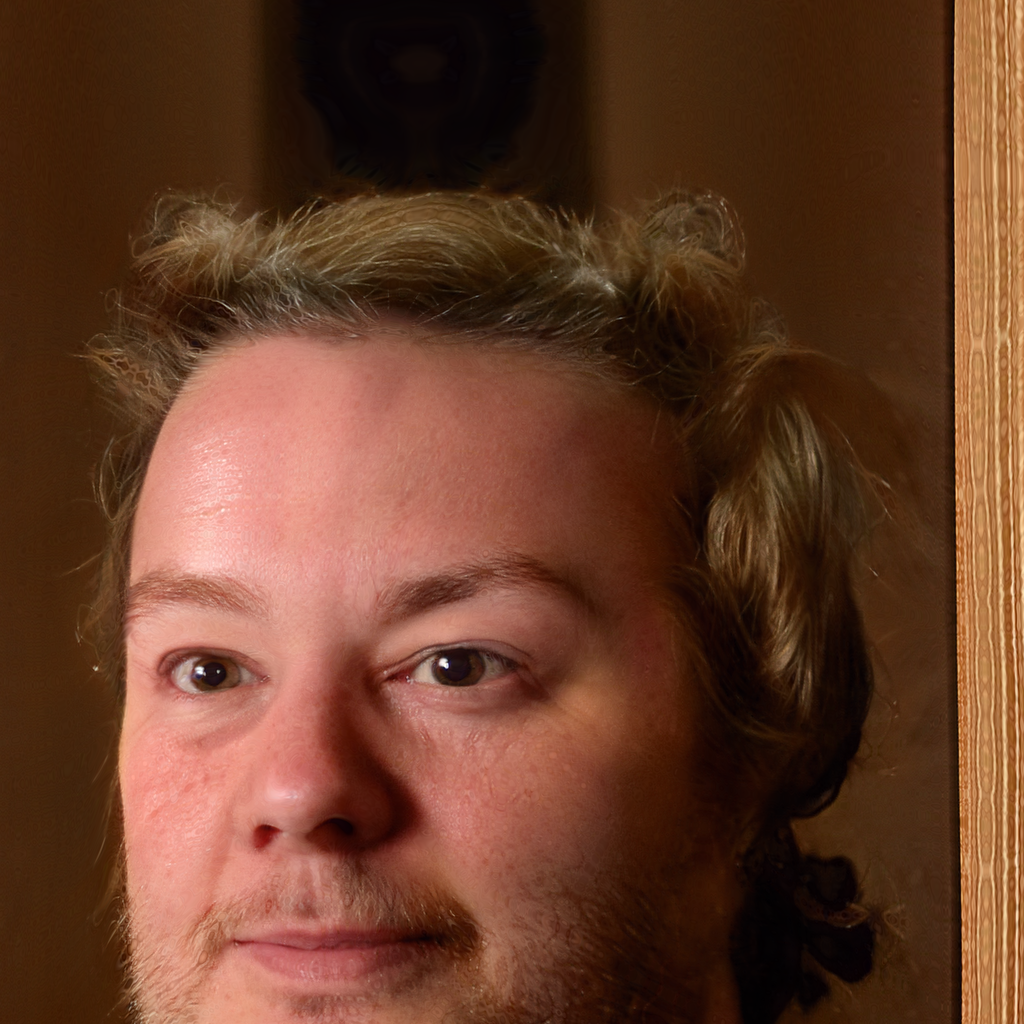

In [31]:
from IPython.display import Image
Image(filename='test1.png') 

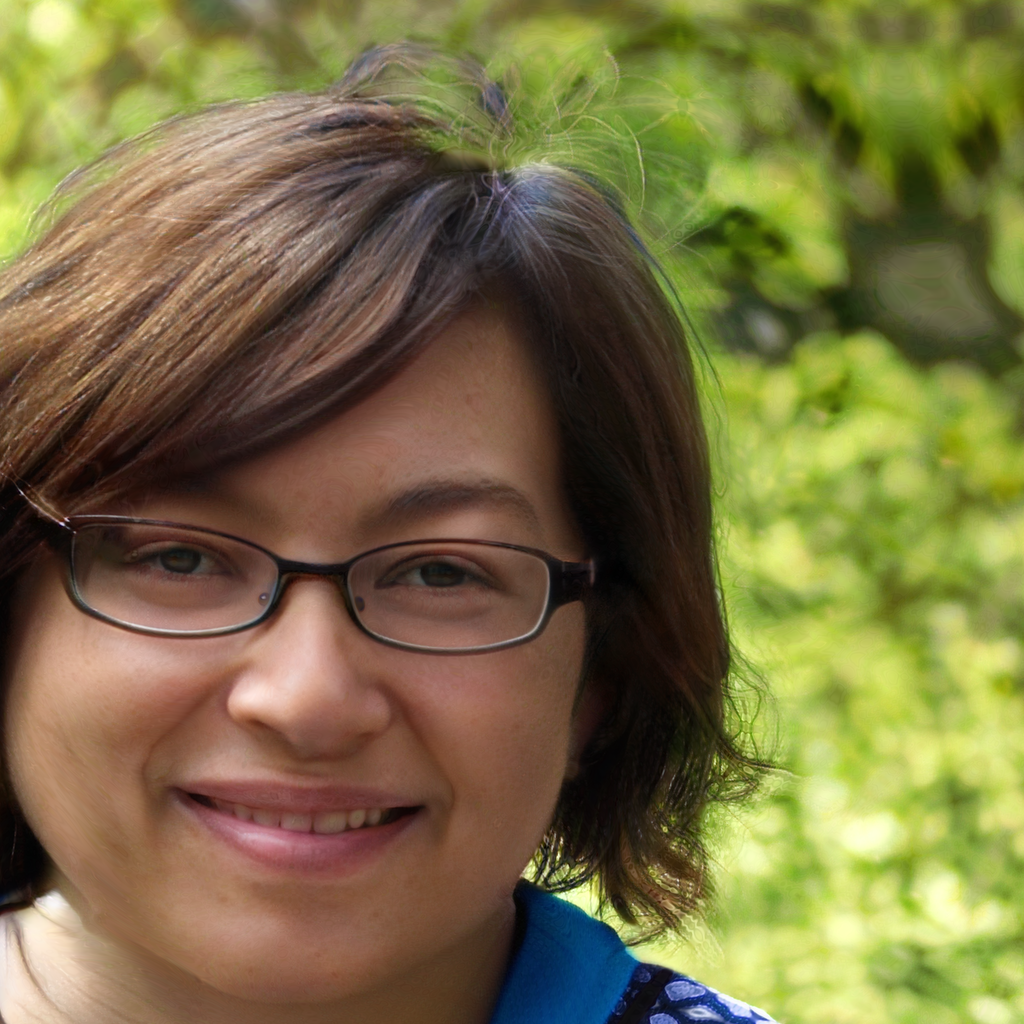

In [34]:
Image(filename='test2.png') 

In [35]:
generator.generate_from('test3.png', inv_test+0.002)

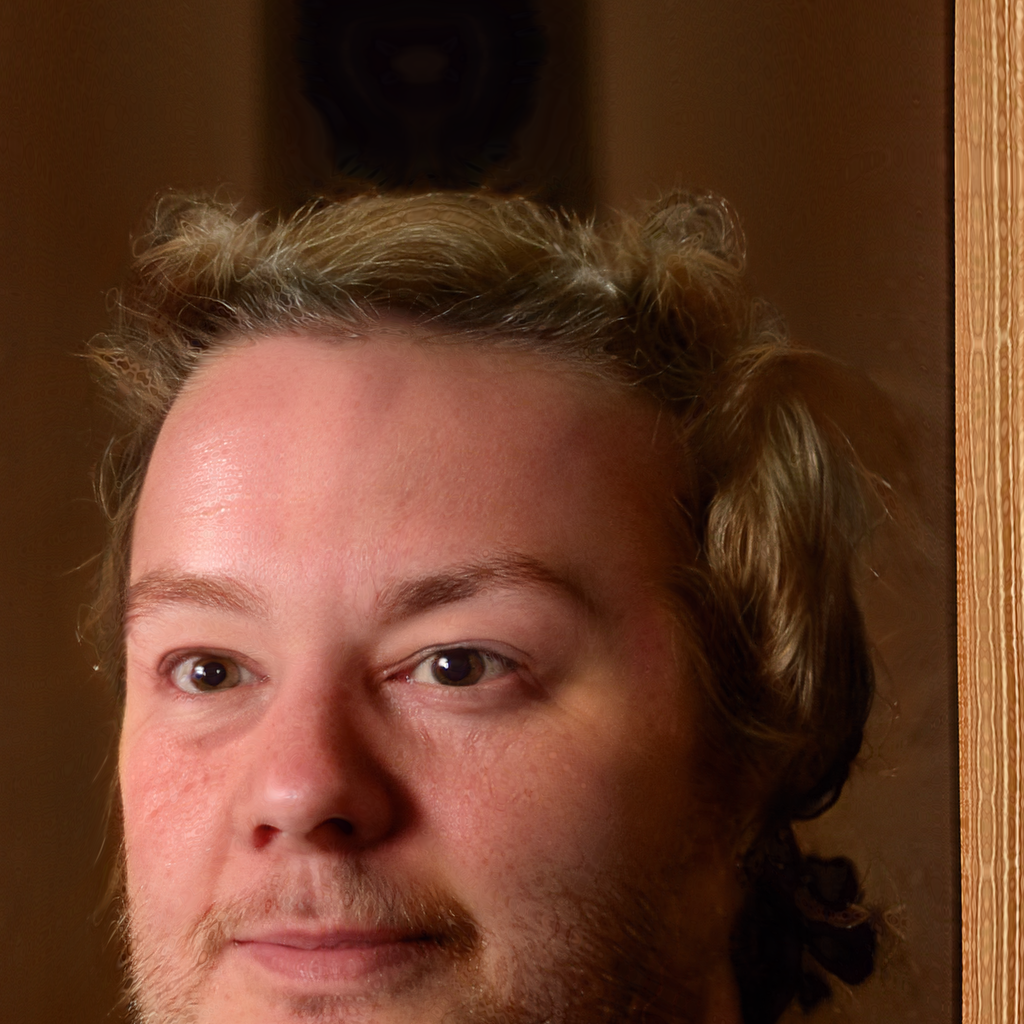

In [36]:
Image(filename='test3.png') 

In [37]:
generator.generate_from('test4.png', inv_test-0.019)

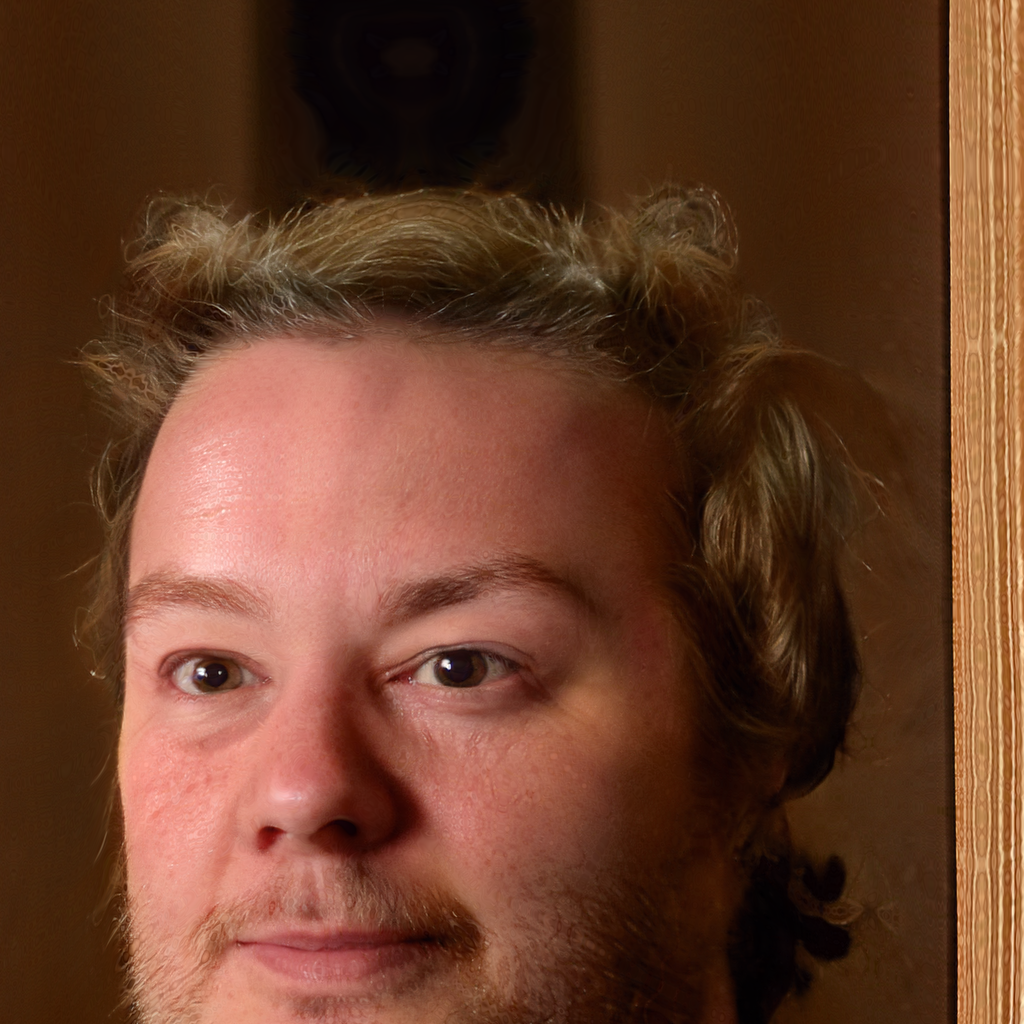

In [38]:
Image(filename='test4.png') 

In [40]:
pred = trainer.predict(test)

AttributeError: __enter__

[[-1.324820 -0.603618 -0.672752 1.192843 0.724271 0.285989 -0.637408
  -0.644106 -0.428456 1.722233 0.964575 -0.478901 -0.728940 0.243732
  0.218383 1.965281 0.847934 0.181213 0.697612 -0.270869 0.582353
  1.605952 2.338631 0.034146 0.388801 0.988266 0.235335 -0.173969
  0.787394 -0.821730 0.859740 -0.786872 -1.856116 -0.881663 -2.715051
  0.226237 -0.472279 0.071800 0.024407 -1.640179 -0.081933 -0.080586
  -1.154909 -1.922865 0.990950 0.418431 0.920372 2.570935 -0.609314
  0.299371 1.207982 0.382676 0.302452 -0.943390 0.683621 -1.090242
  0.803077 -0.948072 1.913116 -0.444495 2.153571 -2.646831 -0.667447
  1.119431 -1.083545 1.175753 0.329014 -0.637855 1.255914 2.329832
  1.046872 0.051927 -0.692230 1.205977 -0.473583 -0.177172 0.400680
  -0.906260 2.050466 -1.166846 -1.363119 -0.189415 0.318347 0.122863
  -0.250115 0.940648 -0.352943 0.142783 0.313292 -0.082977 0.109165
  -0.547162 2.236558 -0.984722 0.171092 -1.688343 0.872603 -0.479971
  -0.721239 0.900657 -2.175058 -1.485236 0.016